In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read data climate
climate = pd.read_csv('/content/drive/MyDrive/project_metrodata/kumpulan_file/Climate Details/climate_data.csv')
climate

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
589260,27-12-2020,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980
589261,28-12-2020,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980
589262,29-12-2020,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980
589263,30-12-2020,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980


In [ ]:
#Ambil data yang diperlukan
climate = climate[['date', 'Tavg', 'RH_avg', 'RR', 'station_id']]
climate

,date,Tavg,RH_avg,RR,station_id
0,01-01-2010,27.1,82.0,9.0,96001
1,02-01-2010,25.7,95.0,24.0,96001
2,03-01-2010,24.5,98.0,63.0,96001
3,04-01-2010,25.8,90.0,0.0,96001
4,05-01-2010,26.7,90.0,2.0,96001
...,...,...,...,...,...
589260,27-12-2020,29.2,74.0,0.0,97980
589261,28-12-2020,28.1,78.0,NaN,97980
589262,29-12-2020,28.4,81.0,NaN,97980
589263,30-12-2020,28.4,80.0,0.0,97980


In [ ]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        589265 non-null  object 
 1   Tavg        544160 non-null  float64
 2   RH_avg      541083 non-null  float64
 3   RR          463881 non-null  float64
 4   station_id  589265 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 22.5+ MB


In [ ]:
climate['date'] = pd.to_datetime(climate['date'])
climate.info()

<ipython-input-7-330d6c0ae718>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  climate['date'] = pd.to_datetime(climate['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        589265 non-null  datetime64[ns]
 1   Tavg        544160 non-null  float64       
 2   RH_avg      541083 non-null  float64       
 3   RR          463881 non-null  float64       
 4   station_id  589265 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 22.5 MB


<ipython-input-7-330d6c0ae718>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate['date'] = pd.to_datetime(climate['date'])


In [ ]:
# Checkin missing values pada climate
missing_values_climate = climate.isnull().sum()
missing_values_climate

date               0
Tavg           45105
RH_avg         48182
RR            125384
station_id         0
dtype: int64

In [ ]:
# Fill missing values with interpolate
climate_clean = climate.fillna(method='ffill')
missing_values_climate = climate_clean.isnull().sum()
missing_values_climate

date          0
Tavg          0
RH_avg        0
RR            0
station_id    0
dtype: int64

In [ ]:
# read data station and province

station = pd.read_csv('/content/drive/MyDrive/project_metrodata/kumpulan_file/Climate Details/station_detail.csv')
province = pd.read_csv('/content/drive/MyDrive/project_metrodata/kumpulan_file/Climate Details/province_detail.csv')

In [ ]:
station_province = pd.merge(station, province[['province_id', 'province_name']], left_on='province_id', right_on='province_id')
station_province

,station_id,station_name,region_name,latitude,longitude,region_id,province_id,province_name
0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
1,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1,Nanggroe Aceh Darussalam
2,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1,Nanggroe Aceh Darussalam
3,96013,Stasiun Geofisika Aceh Besar,Kab. Aceh Besar,5.49600,95.29600,6,1,Nanggroe Aceh Darussalam
4,96015,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya,Kab. Nagan Raya,4.04928,96.24796,15,1,Nanggroe Aceh Darussalam
...,...,...,...,...,...,...,...,...
187,97748,Stasiun Meteorologi Kuffar,Kab. Seram Bagian Timur,-3.88130,130.88000,442,30,Maluku
188,97790,Stasiun Meteorologi Bandaneira,Kab. Maluku Tengah,-4.52338,129.90430,438,30,Maluku
189,97810,Stasiun Meteorologi Karel Sadsuitubun,Kab. Maluku Tenggara,-5.66370,132.73620,439,30,Maluku
190,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30,Maluku


In [ ]:
# Add details to climate data
climate = pd.merge(climate, station_province[['station_id', 'province_name', 'latitude', 'longitude']],
                          left_on='station_id', right_on='station_id')
climate.head()

,date,Tavg,RH_avg,RR,station_id,province_name,latitude,longitude
0,2010-01-01,27.1,82.0,9.0,96001,Nanggroe Aceh Darussalam,5.87655,95.33785
1,2010-02-01,25.7,95.0,24.0,96001,Nanggroe Aceh Darussalam,5.87655,95.33785
2,2010-03-01,24.5,98.0,63.0,96001,Nanggroe Aceh Darussalam,5.87655,95.33785
3,2010-04-01,25.8,90.0,0.0,96001,Nanggroe Aceh Darussalam,5.87655,95.33785
4,2010-05-01,26.7,90.0,2.0,96001,Nanggroe Aceh Darussalam,5.87655,95.33785


In [ ]:
climate['province_name'].unique()

array(['Nanggroe Aceh Darussalam', 'Sumatera Utara', 'Kep. Riau', 'Riau',
       'Sumatera Barat', 'Jambi', 'Sumatera Selatan',
       'Kep. Bangka Belitung', 'Bengkulu', 'Lampung', 'Kalimantan Utara',
       'Kalimantan Timur', 'Kalimantan Barat', 'Kalimantan Tengah',
       'Kalimantan Selatan', 'Banten', 'DKI Jakarta', 'Jawa Barat',
       'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur', 'Sulawesi Utara',
       'Sulawesi Tengah', 'Gorontalo', 'Sulawesi Barat',
       'Sulawesi Selatan', 'Sulawesi Tenggara', 'Bali',
       'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Maluku Utara',
       'Papua Barat', 'Papua', 'Maluku'], dtype=object)

In [ ]:
climate['province_name'] = climate['province_name'].replace('Nanggroe Aceh Darussalam', 'Aceh')
climate.head()

,date,Tavg,RH_avg,RR,station_id,province_name,latitude,longitude
0,2010-01-01,27.1,82.0,9.0,96001,Aceh,5.87655,95.33785
1,2010-02-01,25.7,95.0,24.0,96001,Aceh,5.87655,95.33785
2,2010-03-01,24.5,98.0,63.0,96001,Aceh,5.87655,95.33785
3,2010-04-01,25.8,90.0,0.0,96001,Aceh,5.87655,95.33785
4,2010-05-01,26.7,90.0,2.0,96001,Aceh,5.87655,95.33785


### Read data Harvest

In [ ]:
harvest = pd.read_excel('/content/drive/MyDrive/project_metrodata/kumpulan_file/sayur/aggregated_file/data_sayur_EXCEL.xlsx')
harvest

,province_name,Bawang Merah (Ton),Bawang Putih (Ton),Bawang Daun (Ton),Kentang (Ton),Kubis (Ton),Kembang Kol (Ton),Petsai/Sawi (Ton),Wortel (Ton),Lobak (Ton),...,Ketimun (Ton),Labu Siam (Ton),Kangkung (Ton),Bayam (Ton),Melinjo (Ton),Paprika (Ton),Jamur (Kg),Petai (Ton),Jengkol (Ton),tahun
0,ACEH,3615.00,161.00,2736.00,8587.00,4466.00,990.00,3520.00,2300.00,69.00,...,22166.00,2555.00,11209.00,5620.00,15077.00,-,-,-,-,2010
1,SUMATERA UTARA,9413.00,218.00,16957.00,126203.00,196718.00,22855.00,87757.00,44285.00,10922.00,...,36426.00,10069.00,15425.00,14466.00,5717.00,-,-,-,-,2010
2,SUMATERA BARAT,25058.00,2032.00,22234.00,31949.00,83883.00,5075.00,6599.00,15989.00,241.00,...,21354.00,4316.00,6148.00,2960.00,10488.00,-,-,-,-,2010
3,RIAU,0.00,0.00,30.00,0.00,0.00,0.00,2964.00,0.00,0.00,...,15774.00,671.00,9716.00,4944.00,2032.00,-,-,-,-,2010
4,JAMBI,1492.00,274.00,901.00,84794.00,15232.00,504.00,1470.00,1575.00,545.00,...,7248.00,1421.00,4440.00,1569.00,2829.00,-,-,-,-,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,SULAWESI BARAT,631,886,108,258,2,0,272,5,0,...,768,26,772,511,0,0,0,1,0,2020
370,MALUKU,1106,0,392,1,999,65,2840,1,1,...,3684,3056,4658,1770,295,2,1,185,10,2020
371,MALUKU UTARA,951,0,534,0,19,1,838,0,0,...,2215,338,1970,839,178,0,0,2,0,2020
372,PAPUA BARAT,136,0,201,11,162,45,1293,13,0,...,846,209,2730,1483,13,0,36,18,35,2020


In [ ]:
# Change Pronvince name

harvest['province_name'] = harvest['province_name'].str.title()
harvest

,province_name,Bawang Merah (Ton),Bawang Putih (Ton),Bawang Daun (Ton),Kentang (Ton),Kubis (Ton),Kembang Kol (Ton),Petsai/Sawi (Ton),Wortel (Ton),Lobak (Ton),...,Ketimun (Ton),Labu Siam (Ton),Kangkung (Ton),Bayam (Ton),Melinjo (Ton),Paprika (Ton),Jamur (Kg),Petai (Ton),Jengkol (Ton),tahun
0,Aceh,3615.00,161.00,2736.00,8587.00,4466.00,990.00,3520.00,2300.00,69.00,...,22166.00,2555.00,11209.00,5620.00,15077.00,-,-,-,-,2010
1,Sumatera Utara,9413.00,218.00,16957.00,126203.00,196718.00,22855.00,87757.00,44285.00,10922.00,...,36426.00,10069.00,15425.00,14466.00,5717.00,-,-,-,-,2010
2,Sumatera Barat,25058.00,2032.00,22234.00,31949.00,83883.00,5075.00,6599.00,15989.00,241.00,...,21354.00,4316.00,6148.00,2960.00,10488.00,-,-,-,-,2010
3,Riau,0.00,0.00,30.00,0.00,0.00,0.00,2964.00,0.00,0.00,...,15774.00,671.00,9716.00,4944.00,2032.00,-,-,-,-,2010
4,Jambi,1492.00,274.00,901.00,84794.00,15232.00,504.00,1470.00,1575.00,545.00,...,7248.00,1421.00,4440.00,1569.00,2829.00,-,-,-,-,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Sulawesi Barat,631,886,108,258,2,0,272,5,0,...,768,26,772,511,0,0,0,1,0,2020
370,Maluku,1106,0,392,1,999,65,2840,1,1,...,3684,3056,4658,1770,295,2,1,185,10,2020
371,Maluku Utara,951,0,534,0,19,1,838,0,0,...,2215,338,1970,839,178,0,0,2,0,2020
372,Papua Barat,136,0,201,11,162,45,1293,13,0,...,846,209,2730,1483,13,0,36,18,35,2020


In [ ]:
harvest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   province_name         374 non-null    object
 1   Bawang Merah (Ton)    374 non-null    object
 2   Bawang Putih (Ton)    374 non-null    object
 3   Bawang Daun (Ton)     374 non-null    object
 4   Kentang (Ton)         374 non-null    object
 5   Kubis (Ton)           374 non-null    object
 6   Kembang Kol (Ton)     374 non-null    object
 7   Petsai/Sawi (Ton)     374 non-null    object
 8   Wortel (Ton)          374 non-null    object
 9   Lobak (Ton)           374 non-null    object
 10  Kacang Merah (Ton)    374 non-null    object
 11  Kacang Panjang (Ton)  374 non-null    object
 12  Cabai Besar (Ton)     374 non-null    object
 13  Cabai Rawit (Ton)     374 non-null    object
 14  Tomat (Ton)           374 non-null    object
 15  Terung (Ton)          374 non-null    ob

In [ ]:
# Reshape or melt dataframe to categorical dataframe
melted_harvest = pd.melt(harvest, id_vars=["province_name", "tahun"], var_name="vegetablestype", value_name="total_harvest")
# Replace non-numeric values with NaN
melted_harvest['total_harvest'] = pd.to_numeric(melted_harvest['total_harvest'], errors='coerce')
# Replace 0 values with NaN
melted_harvest['total_harvest'] = melted_harvest['total_harvest'].replace(0, np.nan)
# Drop rows with NaN values
melted_harvest = melted_harvest.dropna()
# Round "total_harvest" column to integers
melted_harvest['total_harvest'] = melted_harvest['total_harvest'].round().astype(int)

melted_harvest

<ipython-input-18-e8205b78ad7f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_harvest['total_harvest'] = melted_harvest['total_harvest'].round().astype(int)


,province_name,tahun,vegetablestype,total_harvest
0,Aceh,2010,Bawang Merah (Ton),3615
1,Sumatera Utara,2010,Bawang Merah (Ton),9413
2,Sumatera Barat,2010,Bawang Merah (Ton),25058
4,Jambi,2010,Bawang Merah (Ton),1492
5,Sumatera Selatan,2010,Bawang Merah (Ton),74
...,...,...,...,...
9342,Sulawesi Selatan,2020,Jengkol (Ton),754
9343,Sulawesi Tenggara,2020,Jengkol (Ton),257
9346,Maluku,2020,Jengkol (Ton),10
9348,Papua Barat,2020,Jengkol (Ton),35


In [ ]:
# Filter rows with 'KG' in vegetablestype
kg_harvest = melted_harvest[melted_harvest['vegetablestype'].str.contains('Kg')]
# Convert total_harvest from kilograms to tons
kg_harvest['total_harvest'] = kg_harvest['total_harvest'] / 1000  # Convert from kg to tons
# Round total_harvest column to 2 decimal places
kg_harvest['total_harvest'] = kg_harvest['total_harvest'].round(4)
melted_harvest.update(kg_harvest)
melted_harvest

<ipython-input-19-f51038079d11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kg_harvest['total_harvest'] = kg_harvest['total_harvest'] / 1000  # Convert from kg to tons
<ipython-input-19-f51038079d11>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kg_harvest['total_harvest'] = kg_harvest['total_harvest'].round(4)
<ipython-input-19-f51038079d11>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,province_name,tahun,vegetablestype,total_harvest
0,Aceh,2010.0,Bawang Merah (Ton),3615.0
1,Sumatera Utara,2010.0,Bawang Merah (Ton),9413.0
2,Sumatera Barat,2010.0,Bawang Merah (Ton),25058.0
4,Jambi,2010.0,Bawang Merah (Ton),1492.0
5,Sumatera Selatan,2010.0,Bawang Merah (Ton),74.0
...,...,...,...,...
9342,Sulawesi Selatan,2020.0,Jengkol (Ton),754.0
9343,Sulawesi Tenggara,2020.0,Jengkol (Ton),257.0
9346,Maluku,2020.0,Jengkol (Ton),10.0
9348,Papua Barat,2020.0,Jengkol (Ton),35.0


In [ ]:
melted_harvest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7269 entries, 0 to 9349
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_name   7269 non-null   object 
 1   tahun           7269 non-null   float64
 2   vegetablestype  7269 non-null   object 
 3   total_harvest   7269 non-null   float64
dtypes: float64(2), object(2)
memory usage: 283.9+ KB


##  Avg Temprature

In [ ]:
df_avg_temprature = climate.groupby([climate['date'].dt.year, 'province_name'])['Tavg'].mean().reset_index()
df_avg_temprature

,date,province_name,Tavg
0,2010,Aceh,26.118920
1,2010,Bali,27.430548
2,2010,Banten,27.337232
3,2010,Bengkulu,25.813699
4,2010,DI Yogyakarta,26.453315
...,...,...,...
369,2020,Sulawesi Tenggara,27.472671
370,2020,Sulawesi Utara,26.656287
371,2020,Sumatera Barat,26.568068
372,2020,Sumatera Selatan,27.509504


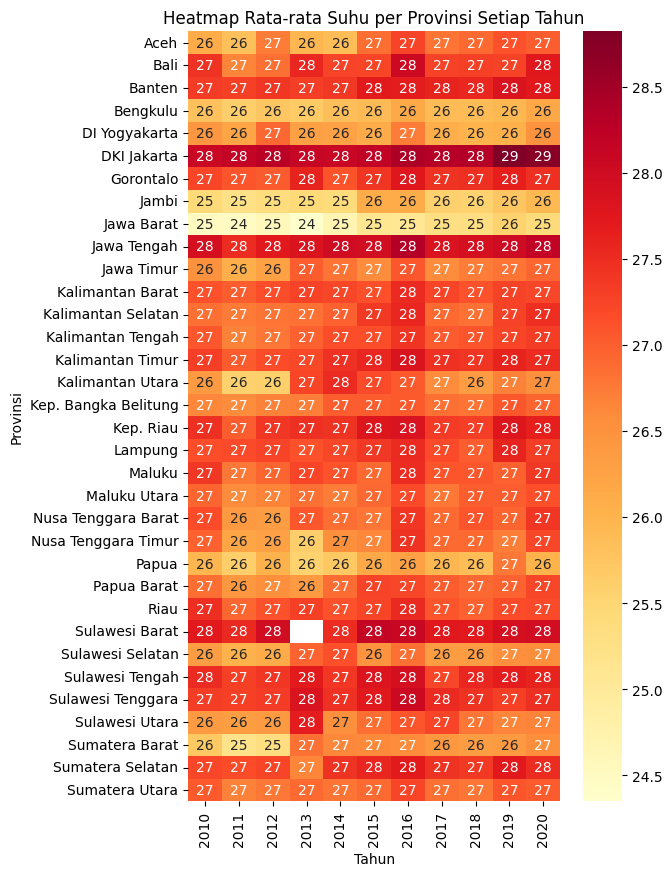

In [ ]:
pivot_data = df_avg_temprature.pivot_table(index='province_name', columns='date', values='Tavg')

plt.figure(figsize=(6, 10))
sns.heatmap(pivot_data, annot=True, cmap='YlOrRd')

plt.xlabel('Tahun')
plt.ylabel('Provinsi')

plt.title('Heatmap Rata-rata Suhu per Provinsi Setiap Tahun')

plt.show()

In [ ]:
# Avarage Yearly Temprature

temp_avg = climate.groupby([climate.date.dt.year])['Tavg'].mean().reset_index()
fig = px.line(temp_avg, x='date', y='Tavg', title='Avarage Temprature Yearly')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Temprature',
    coloraxis_colorbar_title='Average Temprature'
)
fig.show()

## Yearly Avarage Rainfall

In [ ]:
df_avg_rainfall = climate.groupby([climate['date'].dt.year, 'province_name'])['RR'].mean().reset_index()
df_avg_rainfall

,date,province_name,RR
0,2010,Aceh,7.547670
1,2010,Bali,7.594850
2,2010,Banten,7.144458
3,2010,Bengkulu,11.634718
4,2010,DI Yogyakarta,8.133535
...,...,...,...
369,2020,Sulawesi Tenggara,8.253737
370,2020,Sulawesi Utara,9.062368
371,2020,Sumatera Barat,16.661227
372,2020,Sumatera Selatan,9.973684


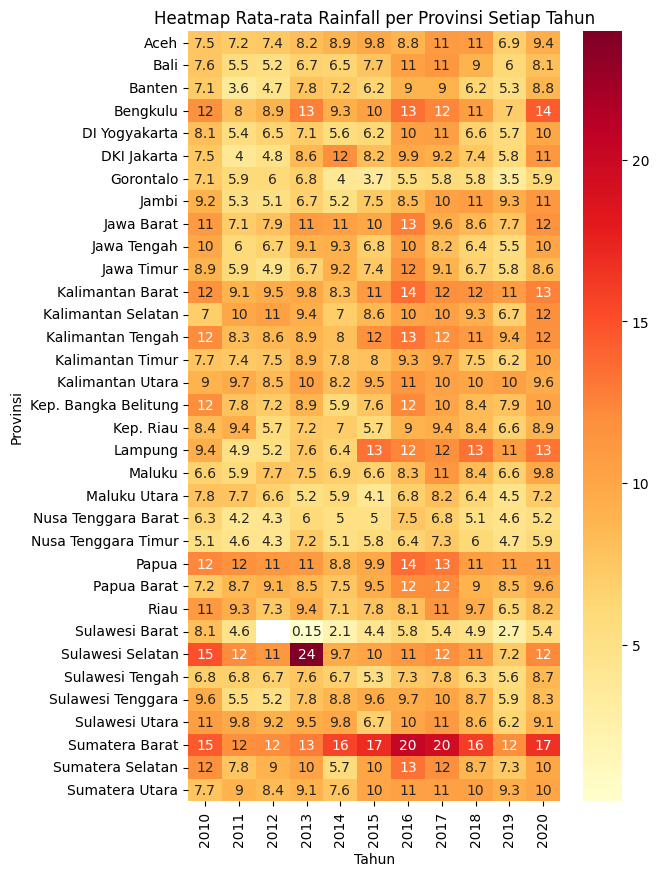

In [ ]:
pivot_rainfall = df_avg_rainfall.pivot_table(index='province_name', columns='date', values='RR')

plt.figure(figsize=(6, 10))
sns.heatmap(pivot_rainfall, annot=True, cmap='YlOrRd')

plt.xlabel('Tahun')
plt.ylabel('Provinsi')

plt.title('Heatmap Rata-rata Rainfall per Provinsi Setiap Tahun')

plt.show()

In [ ]:
avg_rainfall = climate.groupby([climate['date'].dt.year])['RR'].mean().reset_index()
fig = px.line(avg_rainfall, x='date', y='RR', title='Average Rainfall by Province and Year')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Avg Rainfall',
    coloraxis_colorbar_title='Average Rainfall'
)

fig.show()

## Avg Tahunan Sayur

In [ ]:
avg_vegetables = melted_harvest.groupby('vegetablestype')['total_harvest'].mean().reset_index()

fig = px.bar(avg_vegetables, x='vegetablestype', y='total_harvest', title='Avg Yearly')
fig.show()

## Top 10 Cities with total harvest

In [ ]:
melted_harvest.groupby(['province_name']).sum()['total_harvest'].sort_values(ascending=False)[:10]

<ipython-input-28-1218b0f319cb>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



province_name
Jawa Barat             2.951644e+07
Jawa Tengah            2.463486e+07
Jawa Timur             1.928273e+07
Sumatera Utara         1.151388e+07
Sumatera Barat         7.361371e+06
Bengkulu               4.526319e+06
Sulawesi Selatan       4.460809e+06
Nusa Tenggara Barat    3.729331e+06
Sulawesi Utara         3.543179e+06
Jambi                  2.837231e+06
Name: total_harvest, dtype: float64

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/project_metrodata/kumpulan_file/data_aggregate_cleaned.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/project_metrodata/kumpulan_file/data_aggregate_cleaned_(2010-2016).xlsx")

In [ ]:
df2.head()

,province_name,Bawang Merah (Ton),Bawang Putih (Ton),Bawang Daun (Ton),Kentang (Ton),Kubis (Ton),Kembang Kol (Ton),Petsai/Sawi (Ton),Wortel (Ton),Lobak (Ton),...,min_temperature,max_temperature,avg_temperature,avg_humidity,sunshine_duration,max_wind_speed,wind_direction_at_maximum_speed,avg_wind_speed,rain_fall,kepadatan_penduduk_per_km2
0,Aceh,3615.0,161.0,2736.0,8587.0,4466.0,990.0,3520.0,2300.0,69.0,...,21.927606,31.041033,26.118920,84.095730,2.702914,4.993237,162.337844,2.090204,7.594850,78.0
1,Sumatera Utara,9413.0,218.0,16957.0,126203.0,196718.0,22855.0,87757.0,44285.0,10922.0,...,22.774812,32.161768,27.038870,83.492466,3.932870,4.202288,209.157919,2.391304,7.144458,179.0
2,Sumatera Barat,25058.0,2032.0,22234.0,31949.0,83883.0,5075.0,6599.0,15989.0,241.0,...,22.358465,30.464085,25.714051,82.923920,3.566034,3.829864,240.390868,1.760959,11.634718,116.0
3,Riau,0.0,0.0,30.0,0.0,0.0,0.0,2964.0,0.0,0.0,...,23.687260,32.494521,27.489041,81.046575,3.693543,4.186391,247.161937,2.571429,8.133535,64.0
4,Jambi,1492.0,274.0,901.0,84794.0,15232.0,504.0,1470.0,1575.0,545.0,...,22.155535,30.620586,25.445212,85.498155,3.963678,4.131478,214.615014,2.083654,7.489625,62.0


## Korelasi antara jumlah hasil panen dengan curah hujan

In [ ]:
df2['Jamur (Ton)'] = df2['Jamur (Kg)'] / 1000
df2['Rata-rata Produksi Sayur (Ton)'] = df2[['Bawang Merah (Ton)', 'Bawang Putih (Ton)',
       'Bawang Daun (Ton)', 'Kentang (Ton)', 'Kubis (Ton)',
       'Kembang Kol (Ton)', 'Petsai/Sawi (Ton)', 'Wortel (Ton)', 'Lobak (Ton)',
       'Kacang Merah (Ton)', 'Kacang Panjang (Ton)', 'Cabai Besar (Ton)',
       'Cabai Rawit (Ton)', 'Tomat (Ton)', 'Terung (Ton)', 'Buncis (Ton)',
       'Ketimun (Ton)', 'Labu Siam (Ton)', 'Kangkung (Ton)', 'Bayam (Ton)',
       'Melinjo (Ton)', 'Paprika (Ton)', 'Jamur (Ton)', 'Petai (Ton)',
       'Jengkol (Ton)']].mean(axis=1)

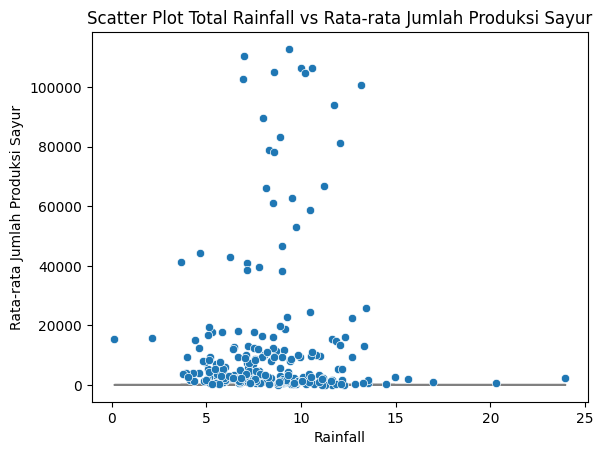

Nilai Korelasi:  0.06396596568220231


In [ ]:
sns.scatterplot(data=df2, x='rain_fall', y='Rata-rata Produksi Sayur (Ton)', zorder=5)

correlation = df2['rain_fall'].corr(df2['Rata-rata Produksi Sayur (Ton)'])

plt.plot(df2['rain_fall'], correlation * df2['rain_fall'], color='gray', zorder=0)

plt.xlabel('Rainfall')
plt.ylabel('Rata-rata Jumlah Produksi Sayur')

plt.title('Scatter Plot Total Rainfall vs Rata-rata Jumlah Produksi Sayur')

plt.show()

print("Nilai Korelasi: ", correlation)

## Korelasi antara kepadatan penduduk dengan curah hujan

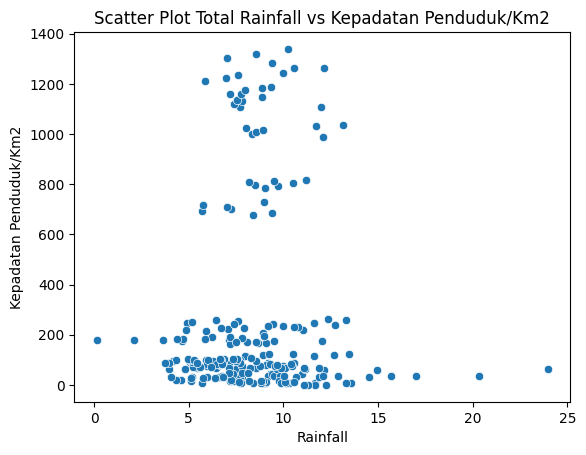

Nilai Korelasi:  0.057208430534064755


In [ ]:
df3 = df2[df2['kepadatan_penduduk_per_km2'] <= 3000] #DKI Jakarta Outlier
sns.scatterplot(data=df3, x='rain_fall', y='kepadatan_penduduk_per_km2', zorder=5)

correlation = df3['rain_fall'].corr(df3['kepadatan_penduduk_per_km2'])

plt.xlabel('Rainfall')
plt.ylabel('Kepadatan Penduduk/Km2')

plt.title('Scatter Plot Total Rainfall vs Kepadatan Penduduk/Km2')

plt.show()

print("Nilai Korelasi: ", correlation)